In [275]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS')

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#custom modules
from toolbox import vis
import importlib
importlib.reload(toolbox.vis)

<module 'toolbox.vis' from 'D:\\Master\\Blok3\\AAS\\toolbox\\vis.py'>

In [264]:
#load data
df14 = pd.read_excel('data2014.xlsx', engine='openpyxl', header = 1)
df14.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,...,Luck,Unnamed: 12,AdjEM.1,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20
0,1,Louisville 4,Amer,31-6,30.41,118.9,7,88.5,5,67.2,...,-0.045,278,4.31,95,107.0,100,102.7,93,-4.65,295
1,2,Arizona 1,P12,33-5,30.11,116.5,20,86.4,1,62.8,...,0.014,151,9.30,17,109.9,20,100.6,18,1.62,113
2,3,Florida 1,SEC,36-3,28.57,116.5,19,88.0,3,61.3,...,0.053,68,9.02,22,109.4,32,100.4,14,2.39,94
3,4,Virginia 1,ACC,2021-07-30 00:00:00,26.46,114.8,27,88.3,4,59.5,...,0.012,154,8.67,28,109.4,31,100.8,27,1.57,114
4,5,Wisconsin 2,B10,2021-08-30 00:00:00,25.89,122.0,4,96.1,35,62.4,...,0.019,133,11.44,3,110.2,13,98.8,2,3.33,68


# Exercise 1 

Select entries from ACC, SEC, B10, BSky,  A10

In [474]:
Conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
df14_5conf = df14[df14.Conf.isin(Conferences)]
df14_5conf.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,...,Luck,Unnamed: 12,AdjEM.1,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20
2,3,Florida 1,SEC,36-3,28.57,116.5,19,88.0,3,61.3,...,0.053,68,9.02,22,109.4,32,100.4,14,2.39,94
3,4,Virginia 1,ACC,2021-07-30 00:00:00,26.46,114.8,27,88.3,4,59.5,...,0.012,154,8.67,28,109.4,31,100.8,27,1.57,114
4,5,Wisconsin 2,B10,2021-08-30 00:00:00,25.89,122.0,4,96.1,35,62.4,...,0.019,133,11.44,3,110.2,13,98.8,2,3.33,68
7,8,Duke 3,ACC,2021-09-26 00:00:00,24.25,124.7,1,100.4,86,64.6,...,-0.035,255,8.76,25,109.2,34,100.5,17,2.40,93
8,9,Michigan St. 4,B10,2021-09-29 00:00:00,23.92,118.6,13,94.7,21,64.4,...,-0.003,192,10.44,6,110.2,15,99.7,5,0.57,144


Binnning

In [475]:
num_bins = 51
max_adjd = df_5conf['AdjD'].max()
min_adjd = df_5conf['AdjD'].min()
bins_adjd = np.arange(min_adjd, max_adjd, (max_adjd-min_adjd)/num_bins )

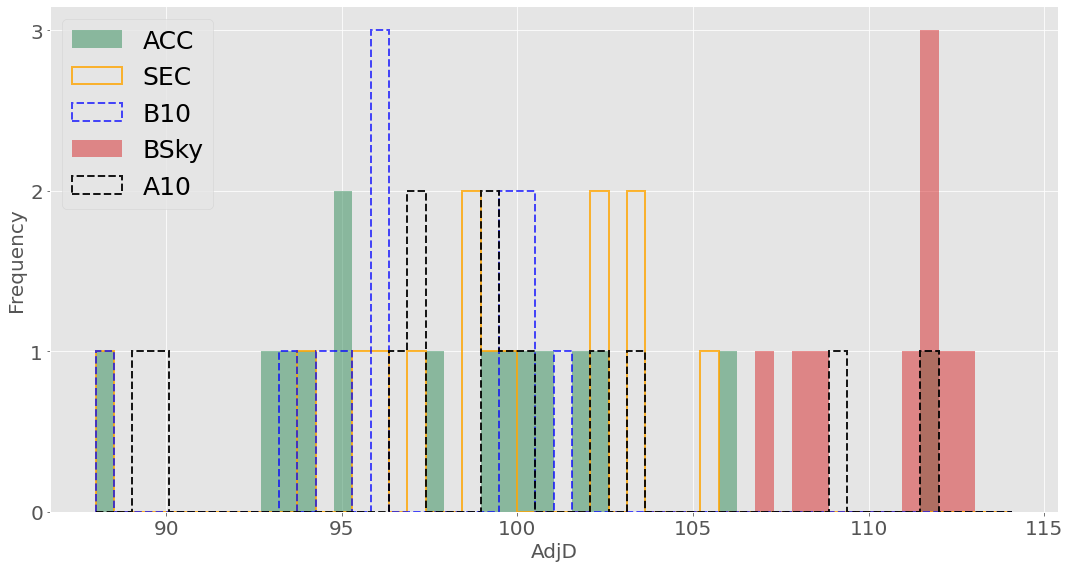

In [476]:
#choose colors and histtype
colors = vis.Color_palette(0)
colors[0] = 'seagreen'
colors[1] = 'orange'
colors[2] = 'b'
colors[4] = 'k'
histtypes = ['bar', 'step', 'step', 'bar', 'step']
histlinestyles = ['solid','solid','dashed','solid','dashed']
alphas = [.5, .8,.7,.5,.9]
#actual plot
fig, ax = plt.subplots(figsize = (15,8))
for i in range(len(Conferences)):
    df_temp = df14_5conf[df14_5conf.Conf.isin([Conferences[i]])]
    ser_temp = df_temp.AdjD
    save_fig = False
    if i == len(Conferences)-1:
        save_fig = True
    x, y, sy, binwidth, fig, ax = toolbox.vis.nice_histogram(ser_temp, bins_adjd, show_plot = False, 
                                                             axis = ax, save = save_fig, figname='ex1.pdf',
                                                            figure = fig, data_label_hist = Conferences[i], 
                                                             color_hist = colors[i], plot_errors = False,
                                                            plot_hist = True, legend_loc=2, histtype = histtypes[i],
                                                            hist_alpha = alphas[i], hist_linestyle = histlinestyles[i],
                                                            legend_fs = 25, xlabel = 'AdjD')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig

In [ ]:
df14.sort_values(by = 'Conf').head()

#  Exercise 2 

In [477]:
df09 = pd.read_excel('data2009.xlsx', engine='openpyxl', header = 0)
df09.head()

,Rk,Team,Conf,W-L,AdjEM,AdjO,Unnamed: 6,AdjD,Unnamed: 8,AdjT,...,Luck,Unnamed: 12,AdjEM.1,Unnamed: 14,OppO,Unnamed: 16,OppD,Unnamed: 18,AdjEM.2,Unnamed: 20
0,1,North Carolina 1,ACC,34-4,31.14,123.2,1,92.1,18,72.9,...,-0.011,195,9.91,24,108.2,27,98.3,15,1.06,126
1,2,Connecticut 1,BE,2021-05-31 00:00:00,29.25,116.0,17,86.8,3,67.1,...,0.024,107,10.37,13,109.0,11,98.6,24,-1.68,200
2,3,Pittsburgh 1,BE,2021-05-31 00:00:00,28.96,121.2,2,92.3,19,65.2,...,-0.012,201,10.11,19,108.1,28,98.0,12,0.79,132
3,4,Memphis 2,CUSA,33-4,28.67,112.8,37,84.2,1,65.9,...,-0.009,190,4.73,77,105.5,73,100.8,78,4.19,67
4,5,Louisville 1,BE,31-6,26.06,111.2,49,85.2,2,66.9,...,0.068,25,9.57,27,108.6,17,99.0,37,-0.19,161


In [478]:
df09_sub = df09[['Team', 'Conf', 'AdjO']]
df14_sub = df14[['Team', 'Conf', 'AdjO']]
df09_sub = df09_sub.rename(columns={"AdjO": "AdjO09", "Conf":"Conf09"})
df14_sub = df14_sub.rename(columns={"AdjO": "AdjO14", "Conf":"Conf14"})
df14_sub.head()

,Team,Conf14,AdjO14
0,Louisville 4,Amer,118.9
1,Arizona 1,P12,116.5
2,Florida 1,SEC,116.5
3,Virginia 1,ACC,114.8
4,Wisconsin 2,B10,122.0


In [479]:
df_comb = pd.merge(df09_sub, df14_sub, left_on='Team', right_on='Team', how = 'inner')
df_comb.head() #some teams changed conference, we therefore use the conference of 2014
#For plot colours we will use conference of 2014

,Team,Conf09,AdjO09,Conf14,AdjO14
0,Syracuse 3,BE,117.0,ACC,114.6
1,Texas 7,B12,112.2,B12,111.8
2,Utah 5,MWC,110.8,P12,110.7
3,Florida 1,SEC,115.1,SEC,116.5
4,Houston,CUSA,109.2,Amer,111.1


In [480]:
df_comb['AdjO_diff'] = df_comb['AdjO14']-df_comb['AdjO09']
df_comb.head()

,Team,Conf09,AdjO09,Conf14,AdjO14,AdjO_diff
0,Syracuse 3,BE,117.0,ACC,114.6,-2.4
1,Texas 7,B12,112.2,B12,111.8,-0.4
2,Utah 5,MWC,110.8,P12,110.7,-0.1
3,Florida 1,SEC,115.1,SEC,116.5,1.4
4,Houston,CUSA,109.2,Amer,111.1,1.9


Now lets plot the difference

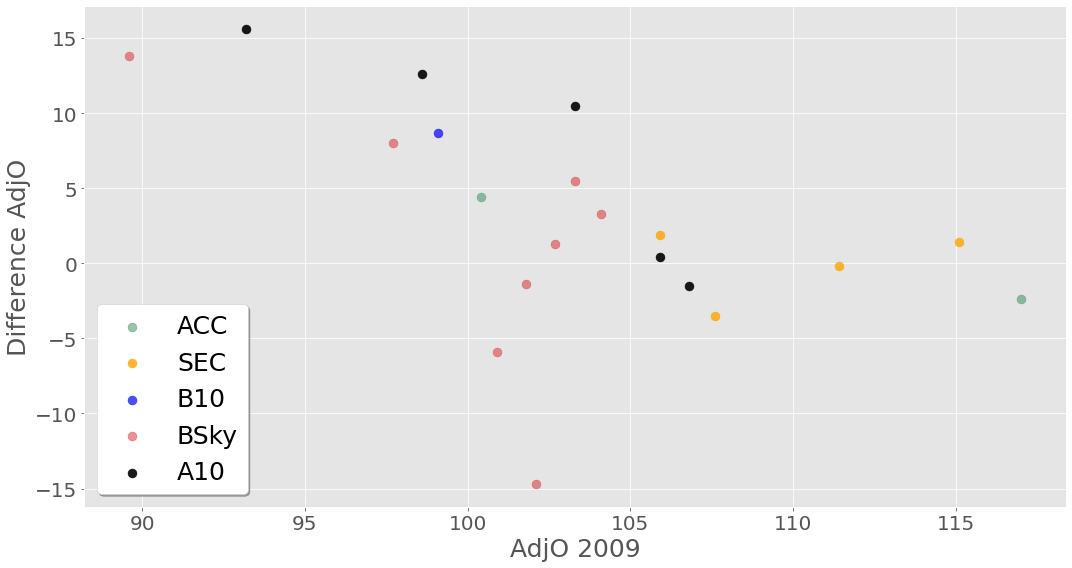

In [484]:
#choose colors and histtype
colors = vis.Color_palette(0)
colors[0] = 'seagreen'
colors[1] = 'orange'
colors[2] = 'b'
colors[4] = 'k'
alphas = [.5, .8,.7,.5,.9]
#actual plot
fig, ax = plt.subplots(figsize = (15,8))
for i in range(len(Conferences)):
    df_temp = df_comb[df_comb.Conf14.isin([Conferences[i]])]
    save_fig = False
    if i == len(Conferences)-1:
        save_fig = True
    ax, fig = toolbox.vis.nice_plot(df_temp['AdjO09'], df_temp['AdjO_diff'], show_plot = False, scatter = True, 
                                                        axis = ax, save_plot = save_fig, figname='ex2.pdf',
                                                        figure = fig, data_label = Conferences[i],                                                 
                                                        legend_loc=3, color = colors[i], alpha = alphas[i],                                     
                                                        legend_fs = 25, xlabel = 'AdjO 2009', 
                                                        ylabel = 'Difference AdjO', scr_markersize = 80)
    
    #ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig

In [482]:
#split data in conferences
df_comb_red = df_comb[df_comb.Conf14.isin(Conferences)]
df_comb_rest = df_comb[~df_comb.Conf14.isin(Conferences)]

In [483]:
#Compute mean and median
Mean5 = df_comb_red.groupby('Conf14').mean()
Med5 = df_comb_red.groupby('Conf14').median()
MeanRest = df_comb_rest['AdjO_diff'].mean()
MedRest = df_comb_rest['AdjO_diff'].median()
Mean = Mean5['AdjO_diff'].append(pd.Series([MeanRest], index = ['Rest']))
Median = Med5['AdjO_diff'].append(pd.Series([MedRest], index = ['Rest']))

In [503]:
importlib.reload(toolbox.vis)

<module 'toolbox.vis' from 'D:\\Master\\Blok3\\AAS\\toolbox\\vis.py'>

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


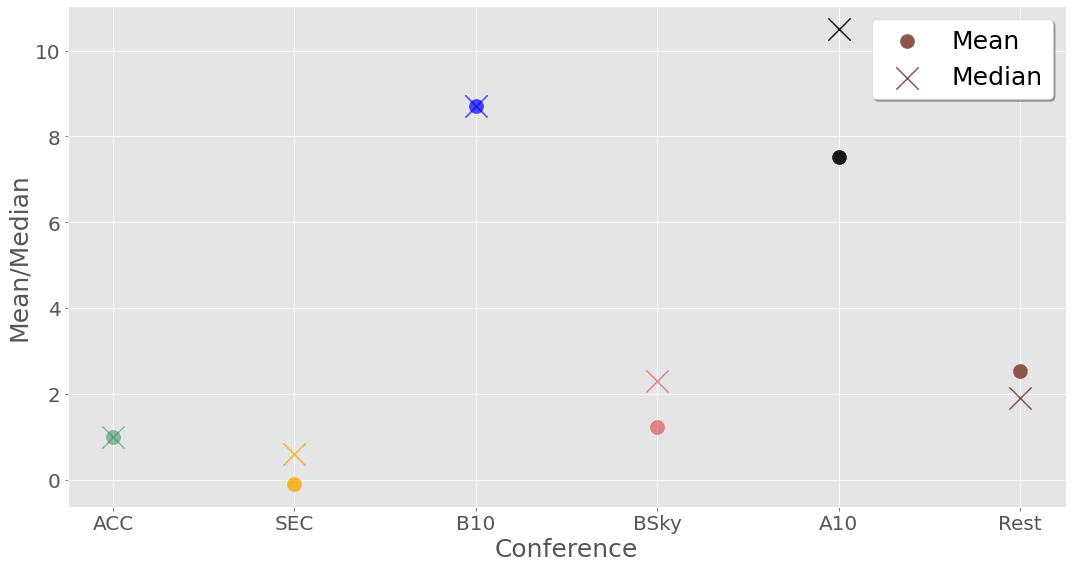

In [513]:
fig, ax = plt.subplots(figsize = (15,8))
colors = vis.Color_palette(0)
colors.append('r')
colors[0] = 'seagreen'
colors[1] = 'orange'
colors[2] = 'b'
colors[4] = 'k'
alphas = [.5, .8,.7,.5,.9,1]
Conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
Conferences.append('Rest')
x_axis = np.arange(len(Conferences))
for i in range(len(Conferences)):
    save_fig = False
    label_mean = None
    if i == len(Conferences)-1:
        ax.set_xticks(x_axis)
        ax.set_xticklabels(Conferences)
        label_mean  = 'Mean'
    ax, fig = toolbox.vis.nice_plot(x_axis[i], Mean[Conferences[i]], show_plot = False, scatter = True, 
                                    axis = ax, save_plot = save_fig, figname='ex2_2.pdf',
                                    figure = fig, data_label = label_mean,                                                 
                                    legend_loc=3, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'Conference', 
                                    ylabel = 'Mean/Median', scr_markersize = 200)
for i in range(len(Conferences)):
    save_fig = False
    label_med = None
    if i == len(Conferences)-1:
        save_fig = True
        ax.set_xticks(x_axis)
        ax.set_xticklabels(Conferences)
        label_med = 'Median'
    ax, fig = toolbox.vis.nice_plot(x_axis[i], Median[Conferences[i]], show_plot = False, scatter = True, 
                                    axis = ax, save_plot = save_fig, figname='ex2_2.pdf',
                                    figure = fig, data_label = label_med,                                                 
                                    legend_loc=1, color = colors[i], alpha = alphas[i],                                     
                                    legend_fs = 25, xlabel = 'Conference', 
                                    ylabel = 'Mean/Median', scr_markersize = 500, scr_markerstyle='x')

fig